In [12]:
"""
Created on Sat, May 2, 16:54:30 2019
@author: Surya Pratap Singh
"""

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math # for performing mathematical operations like round(), sin() etc
import matplotlib.pyplot as plt # for plotting and visualizing
import tensorflow as tf # using tensorflow
from tensorflow.contrib.layers import fully_connected

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['sample_submission.csv', 'test.csv', 'train.csv']


In [13]:
#importing mnist dataset

training_data = pd.read_csv("../input/train.csv")

train_data = (training_data.iloc[0:math.floor(len(training_data.index)*0.7),1:].values, 
              training_data.iloc[0:math.floor(len(training_data.index)*0.7),0].values)
test_data = (training_data.iloc[math.floor(len(training_data.index)*0.7)+1:,1:].values, 
             training_data.iloc[math.floor(len(training_data.index)*0.7)+1:,0].values)


In [14]:
train_data[0].shape


(29399, 784)

In [15]:
tf.reset_default_graph()

In [16]:
batch_size = tf.placeholder(tf.int64)
num_features =  len(training_data.columns)-1
X = tf.placeholder(tf.float32, shape=[None, num_features])

training_dataset = tf.data.Dataset.from_tensor_slices( X ).batch(batch_size).repeat()

iter1 = training_dataset.make_initializable_iterator()
features = iter1.get_next()


In [17]:
'''
defining the number of units in each layer, learning rate and 
the activation function to be used. All of this defines the basic 
structure of the graph
'''

input_features = 784 #28x28 pixels
hidden_units1 = 392
hidden_units2 = 196
hidden_units3 = 98
hidden_units4 = hidden_units2
hidden_units5 = hidden_units1
output_units = input_features

learning_rate = 0.01

actf = tf.nn.relu

In [18]:
initializer = tf.variance_scaling_initializer() #this is done to make the 
#variance of the outputs equla to that of variance of inputs. 

In [19]:
#defining the weights of each layer
wt1 = tf.Variable(initializer([input_features, hidden_units1]), dtype = tf.float32)
wt2 = tf.Variable(initializer([hidden_units1, hidden_units2]), dtype = tf.float32)
wt3 = tf.Variable(initializer([hidden_units2, hidden_units3]), dtype = tf.float32)
wt4 = tf.Variable(initializer([hidden_units3, hidden_units4]), dtype = tf.float32)
wt5 = tf.Variable(initializer([hidden_units4, hidden_units5]), dtype = tf.float32)
wt6 = tf.Variable(initializer([hidden_units5, output_units]), dtype = tf.float32)

#defining the biases for each layer
b1 = tf.Variable(tf.zeros(hidden_units1))
b2 = tf.Variable(tf.zeros(hidden_units2))
b3 = tf.Variable(tf.zeros(hidden_units3))
b4 = tf.Variable(tf.zeros(hidden_units4))
b5 = tf.Variable(tf.zeros(hidden_units5))
b6 = tf.Variable(tf.zeros(output_units))

#defining feedforward
hidden_units1 = actf(tf.matmul(features,wt1)+b1)
hidden_units2 = actf(tf.matmul(hidden_units1,wt2)+b2)
hidden_units3 = actf(tf.matmul(hidden_units2,wt3)+b3)
hidden_units4 = actf(tf.matmul(hidden_units3,wt4)+b4)
hidden_units5 = actf(tf.matmul(hidden_units4,wt5)+b5)
output_units = actf(tf.matmul(hidden_units5,wt6)+b6)

#defining loss function
loss = tf.reduce_mean(tf.square(output_units - features))

#defining the optimizing function
optimizer = tf.train.AdamOptimizer()
train = optimizer.minimize(loss)

In [20]:
init = tf.global_variables_initializer()

epoch_num = 5
BATCH_SIZE = 150
num_test_images = 10
num_batches = math.floor(training_data.shape[0]*0.7)//BATCH_SIZE

Training...
0
Iter: 0, Loss: 2340.3729
1
Iter: 1, Loss: 1209.8279
2
Iter: 2, Loss: 1030.6634
3
Iter: 3, Loss: 946.9876
4
Iter: 4, Loss: 897.1825


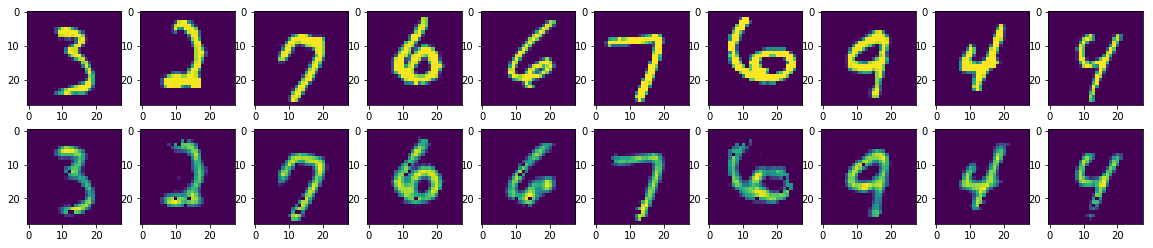

In [21]:
with tf.Session() as sess:
    sess.run(init)
    sess.run(iter1.initializer, feed_dict={ X: train_data[0], batch_size: BATCH_SIZE})
    print('Training...')
    for epoch in range(epoch_num):
        print(epoch)
        tot_loss = 0
        for _ in range(num_batches):
            _, loss_value = sess.run([train, loss])
            tot_loss += loss_value
        print("Iter: {}, Loss: {:.4f}".format(epoch, tot_loss / num_batches))
    
    # initialise iterator with test data
    sess.run(iter1.initializer, feed_dict={ X: test_data[0], batch_size: num_test_images})
    results = sess.run(output_units)
    
    #let us see how the constructions look like
    f, a = plt.subplots(2,10,figsize=(20,4))
    for i in range(10):
        a[0][i].imshow(np.reshape(test_data[0][i],(28,28)))
        a[1][i].imshow(np.reshape(results[i],(28,28)))
        
    